In [44]:
import statsmodels as sm
import pmdarima
from pmdarima.arima import ndiffs, nsdiffs
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
from scipy.stats import shapiro


In [19]:
df = pd.read_csv("monthly_data.csv")

In [20]:
df['Index'] = df['ID_material'].astype(str) + df['Year'].astype(str) + df['MonthName'].astype(str)
df.set_index('Index', inplace=True)

In [21]:
columns_to_keep = ['ID_material', 'Units']
df = df[columns_to_keep]

In [23]:
# Get unique ID_material values
unique_materials = df['ID_material'].unique()
# Loop over each unique material
for material in unique_materials:
    # Subset the DataFrame for the current material
    material_df = df[df['ID_material'] == material]
    # Extract the 'Units' column as the series 'y'
    y = material_df['Units']
    # Perform ADF test
    adf_test = sm.tsa.stattools.adfuller(y, maxlag=8)
    # Print ADF test results
    print(f"ADF test for material {material}")
    print("p-value:", adf_test[1])
    if adf_test[1] > 0.05:
    # Calculate regular differences
        d = ndiffs(y, alpha=0.05, test='adf')
    # Calculate seasonal differences
        s = 12  # Assuming monthly data
        D = nsdiffs(y, m=s, test='ocsb')
    # Print difference results
        print("Regular differences:", d)
        print("Seasonal differences:", D)
        print()  # Print an empty line for separation between materials
    else:
        print()

ADF test for material 120004096
p-value: 0.1948228977087264
Regular differences: 1
Seasonal differences: 0

ADF test for material 120014488
p-value: 1.4058481841493044e-06

ADF test for material 120014486
p-value: 1.031030903352756e-09

ADF test for material 120015996
p-value: 6.963898055089403e-09

ADF test for material 120009816
p-value: 3.9873494724739897e-07

ADF test for material 120010342
p-value: 0.00016947350917990018

ADF test for material 120009814
p-value: 1.3017819762009035e-08

ADF test for material 120010566
p-value: 1.7818633610404686e-08

ADF test for material 120010970
p-value: 8.464236807241405e-16

ADF test for material 120011782
p-value: 0.8850782471437655
Regular differences: 1
Seasonal differences: 0

ADF test for material 120011556
p-value: 2.346754348297189e-12

ADF test for material 120012154
p-value: 0.00018635356242198843

ADF test for material 120012606
p-value: 4.208496809003759e-08

ADF test for material 120015842
p-value: 0.006808135481700321



In [26]:
#Loading data with stationarity
df = pd.read_csv("monthly_data_stationary.csv")

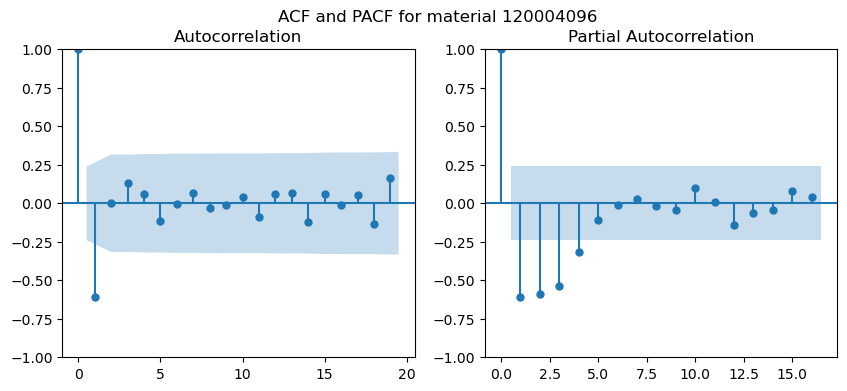

Ljung-Box test for material 120004096
p-value: 0.0025958529822907705
(Our data DONT seems be White Noise)The residuals are likely not independently distributed (reject null hypothesis)



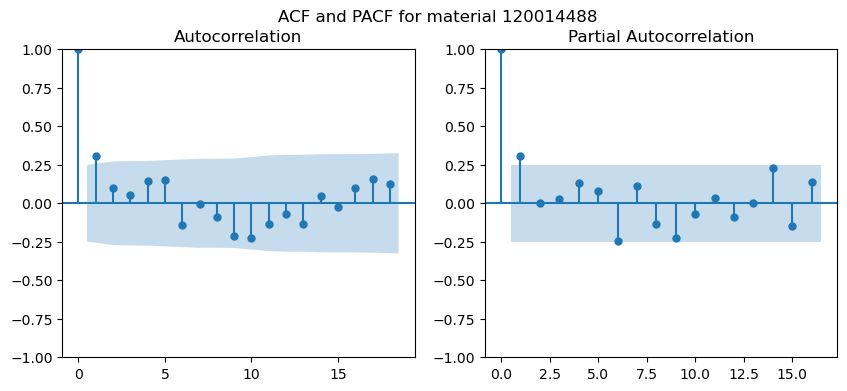

Ljung-Box test for material 120014488
p-value: 0.04499272233251076
(Our data DONT seems be White Noise)The residuals are likely not independently distributed (reject null hypothesis)



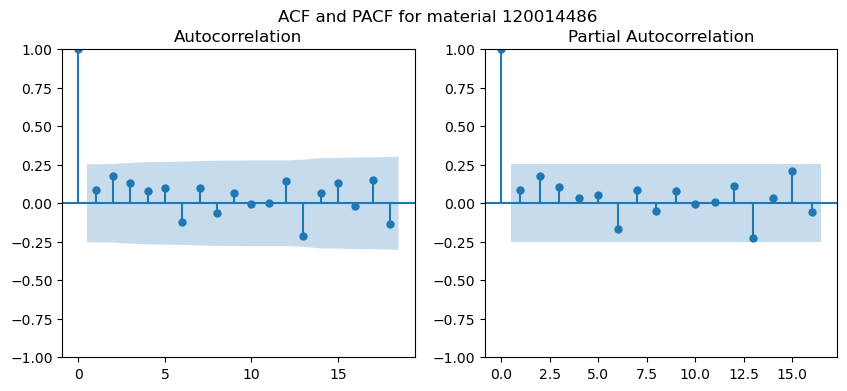

Ljung-Box test for material 120014486
p-value: 0.7330313493588274
(Our data might be White Noise)The residuals are likely independently distributed (fail to reject null hypothesis)



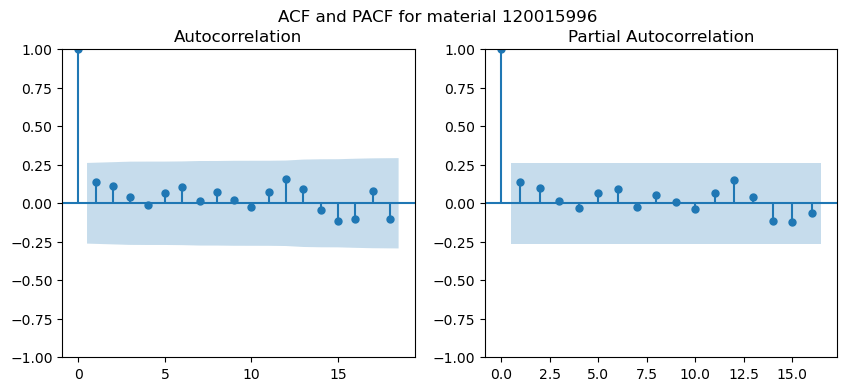

Ljung-Box test for material 120015996
p-value: 0.9282473179308702
(Our data might be White Noise)The residuals are likely independently distributed (fail to reject null hypothesis)



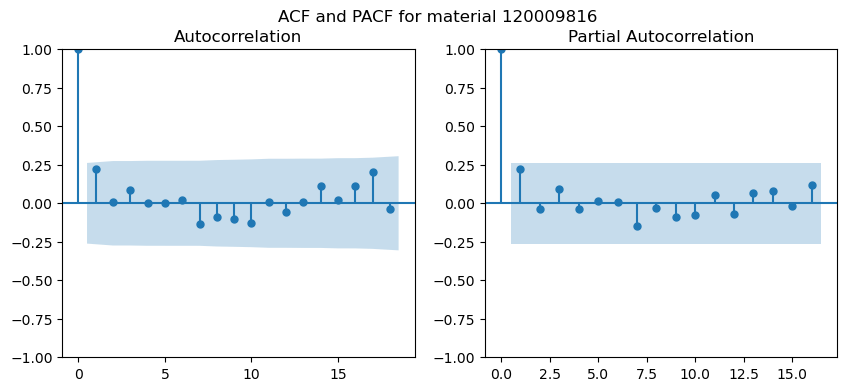

Ljung-Box test for material 120009816
p-value: 0.8421865718054021
(Our data might be White Noise)The residuals are likely independently distributed (fail to reject null hypothesis)



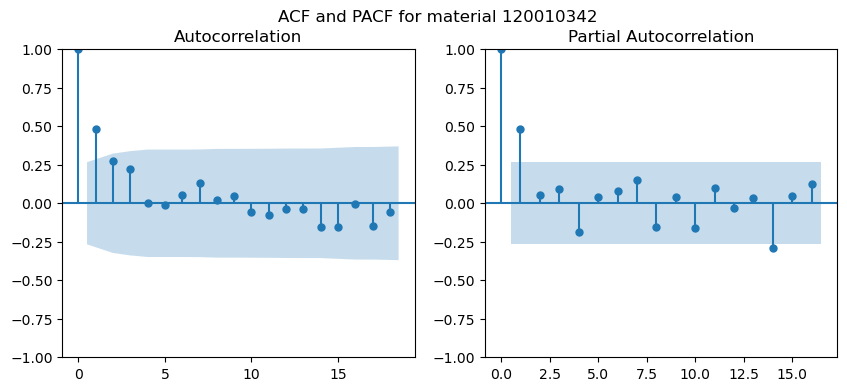

Ljung-Box test for material 120010342
p-value: 0.03062543808120765
(Our data DONT seems be White Noise)The residuals are likely not independently distributed (reject null hypothesis)



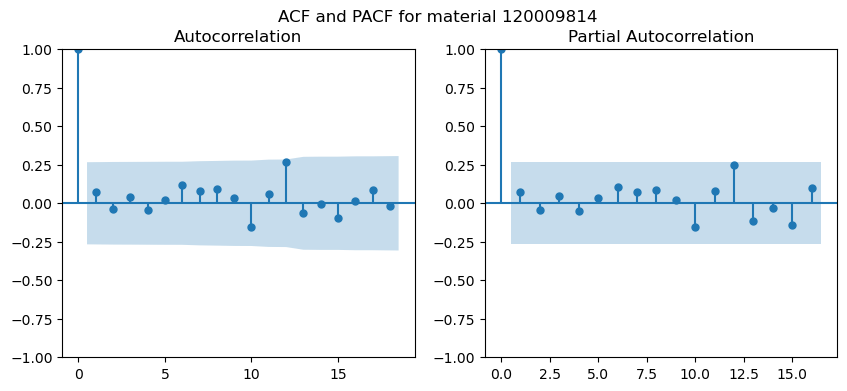

Ljung-Box test for material 120009814
p-value: 0.6512882060458092
(Our data might be White Noise)The residuals are likely independently distributed (fail to reject null hypothesis)



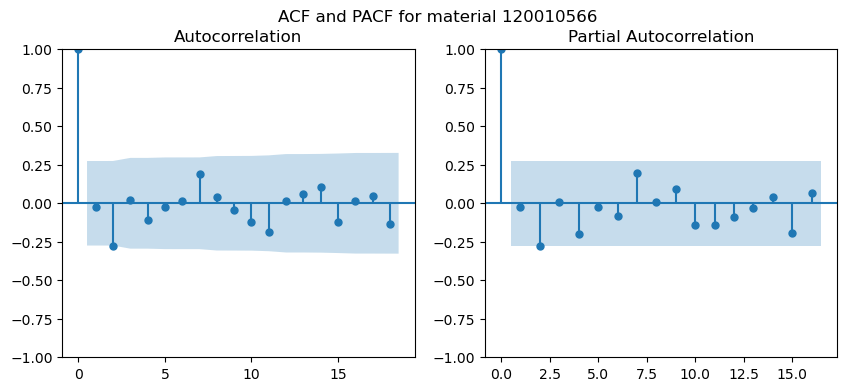

Ljung-Box test for material 120010566
p-value: 0.5529342668777166
(Our data might be White Noise)The residuals are likely independently distributed (fail to reject null hypothesis)



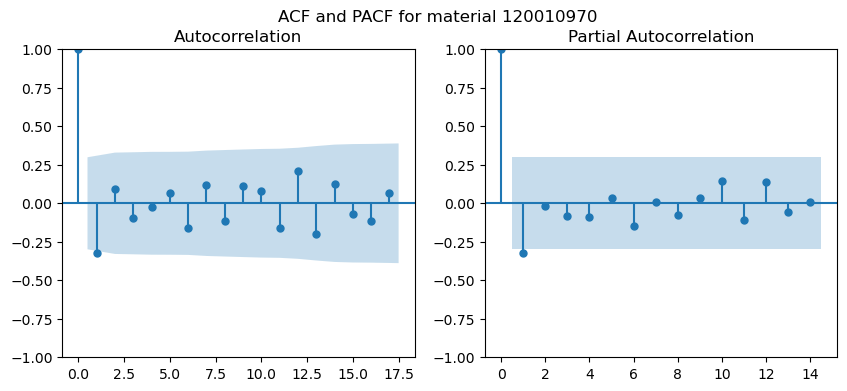

Ljung-Box test for material 120010970
p-value: 0.27902164753803455
(Our data might be White Noise)The residuals are likely independently distributed (fail to reject null hypothesis)



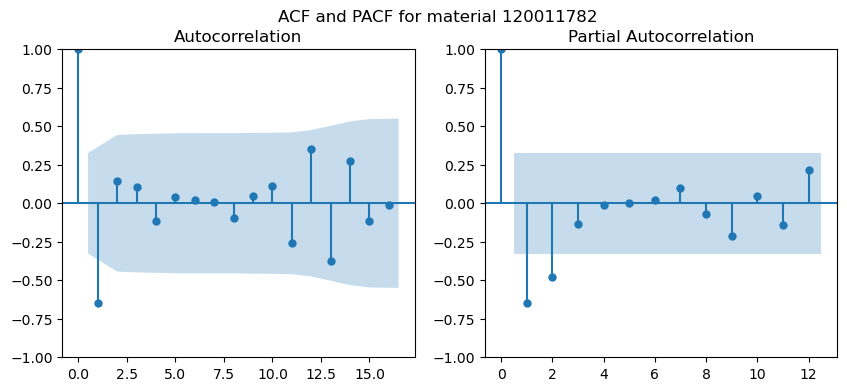

Ljung-Box test for material 120011782
p-value: 0.002366660240719144
(Our data DONT seems be White Noise)The residuals are likely not independently distributed (reject null hypothesis)



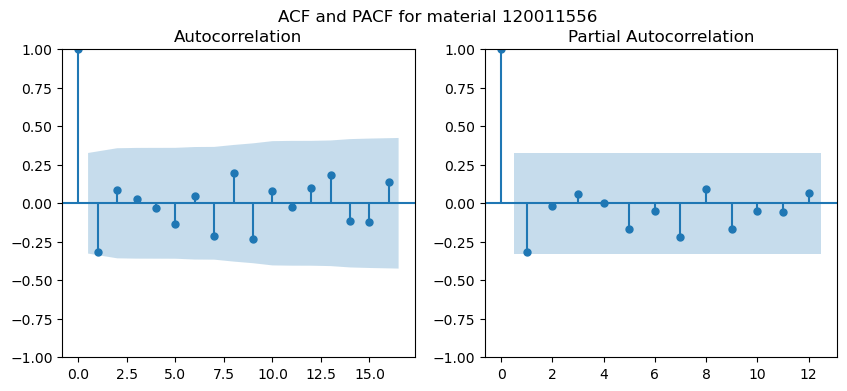

Ljung-Box test for material 120011556
p-value: 0.3933716198432251
(Our data might be White Noise)The residuals are likely independently distributed (fail to reject null hypothesis)



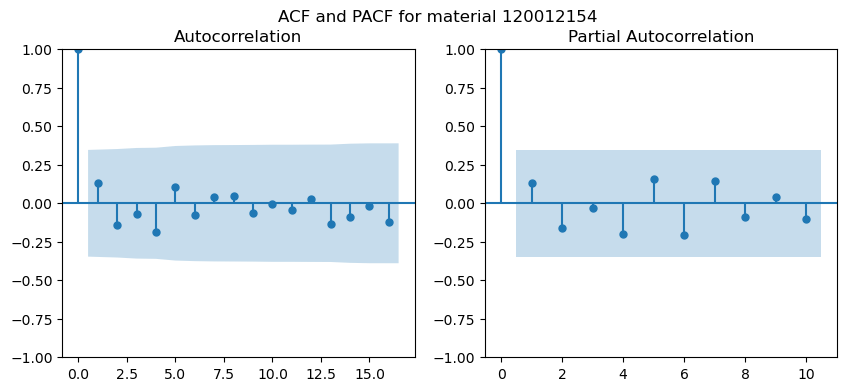

Ljung-Box test for material 120012154
p-value: 0.9815599827268615
(Our data might be White Noise)The residuals are likely independently distributed (fail to reject null hypothesis)



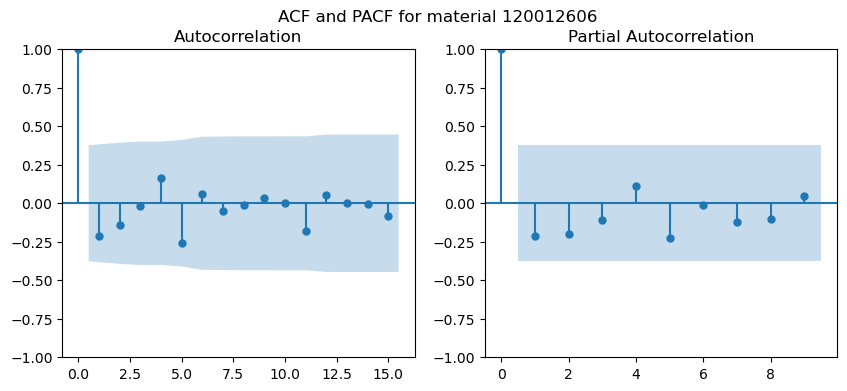

Ljung-Box test for material 120012606
p-value: 0.8398297171598843
(Our data might be White Noise)The residuals are likely independently distributed (fail to reject null hypothesis)



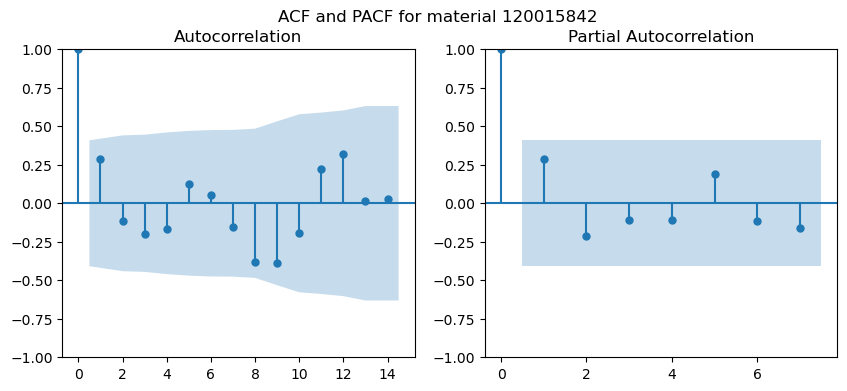

Ljung-Box test for material 120015842
p-value: 0.007088590856413069
(Our data DONT seems be White Noise)The residuals are likely not independently distributed (reject null hypothesis)



In [40]:
# Loop over each unique material
for material in unique_materials:
    # Subset the DataFrame for the current material
    material_df = df[df['ID_material'] == material]
    # Extract the 'Units' column as the series 'y'
    y = material_df['Units']
    # Plot ACF and PACF
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    plot_acf(y, ax=axes[0])
    plot_pacf(y, ax=axes[1],method="ywm",lags=min(16, len(y)//3))
    plt.suptitle(f"ACF and PACF for material {material}")
    plt.show()
    # Ljung-Box test
    lb_test = acorr_ljungbox(y, lags=[12], return_df=True)
    p_value = lb_test['lb_pvalue'].values[0]
    # Print Ljung-Box test results
    print(f"Ljung-Box test for material {material}")
    print("p-value:", p_value)
    if p_value < 0.05:
        print("(Our data DONT seems be White Noise)The residuals are likely not independently distributed (reject null hypothesis)")
    else:
        print("(Our data might be White Noise)The residuals are likely independently distributed (fail to reject null hypothesis)")
    print()  # Print an empty line for separation between materials

In [45]:
for material in unique_materials:
    # Subset the DataFrame for the current material
    material_df = df[df['ID_material'] == material]
    # Extract the 'Units' column as the series 'y'
    y = material_df['Units']
    # Shapiro-Wilk test
    shapiro_test = shapiro(y)
    p_value = shapiro_test[1]
    # Print Shapiro-Wilk test results
    print(f"Shapiro-Wilk test for material {material}")
    print("p-value:", p_value)
    if p_value < 0.05:
        print("The data is likely not normally distributed (reject null hypothesis)")
    else:
        print("The data is likely normally distributed (fail to reject null hypothesis)")
    print()  # Print an empty line for separation between materials

Shapiro-Wilk test for material 120004096
p-value: 0.187450110912323
The data is likely normally distributed (fail to reject null hypothesis)

Shapiro-Wilk test for material 120014488
p-value: 0.033419109880924225
The data is likely not normally distributed (reject null hypothesis)

Shapiro-Wilk test for material 120014486
p-value: 0.13184821605682373
The data is likely normally distributed (fail to reject null hypothesis)

Shapiro-Wilk test for material 120015996
p-value: 0.7980265617370605
The data is likely normally distributed (fail to reject null hypothesis)

Shapiro-Wilk test for material 120009816
p-value: 0.13273221254348755
The data is likely normally distributed (fail to reject null hypothesis)

Shapiro-Wilk test for material 120010342
p-value: 0.014332197606563568
The data is likely not normally distributed (reject null hypothesis)

Shapiro-Wilk test for material 120009814
p-value: 0.23499983549118042
The data is likely normally distributed (fail to reject null hypothesis)

S